<a href="https://colab.research.google.com/github/GabAsencios/Titanic_Survival_Prediction_models/blob/main/Logistic_Regression%26Perceptron_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time
import scipy
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

import sklearn

/tmp/ipython-input-3540939394.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


# Q1. Titanic survival predicting model

(a) Graphs/plots of Titanic.csv dataset

In [ ]:
import pandas as pd


# Load CSV file
df = pd.read_csv("/content/Titanic.csv")

# Exploring the data
display(df)
print("\nMissing values:")
display(df.isnull().sum())


# Display the sum of survivors and non-survivors
print("\nSurvival counts:")
display(df['Survived'].value_counts())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C



Missing values:


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2



Survival counts:


,count
Survived,
0,549
1,342


Graphs of **total** count distribution of Age, Fare, Passenger class and Sex.

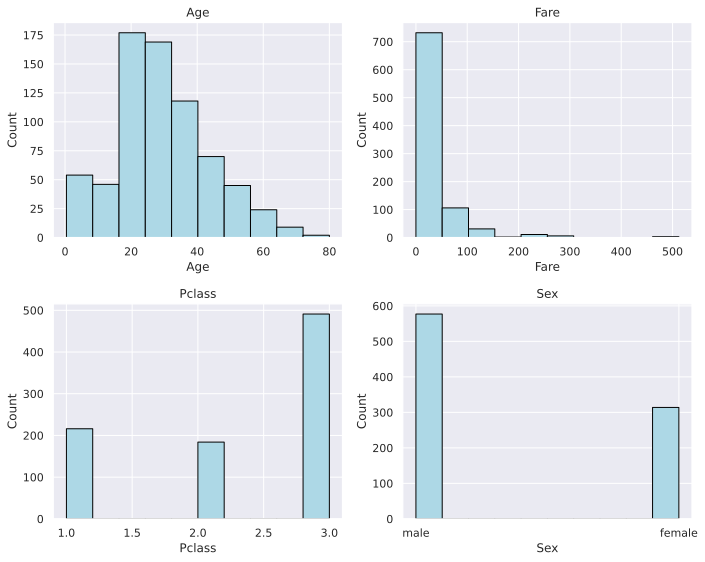

In [ ]:
# Distribution of all passengers based on age, fare, ticket class and fare
plt.figure(figsize=(10, 8))

selected_columns = ['Age', 'Fare', 'Pclass', 'Sex']

# Loop over each column to create a histogram
for i, column in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for the histograms

    # Divide the values into "bins"
    plt.hist(df[column], bins=10, color='lightblue', edgecolor='black')

    # Plot settings
    plt.title(f'{column}')  # Title for each plot
    plt.xlabel(column)      # X-axis label
    plt.ylabel('Count')     # Y-axis label

# Show the histograms
plt.tight_layout()
plt.show()

Graphs of **total survivors** distribution of Age, Fare, Passenger class and Sex.

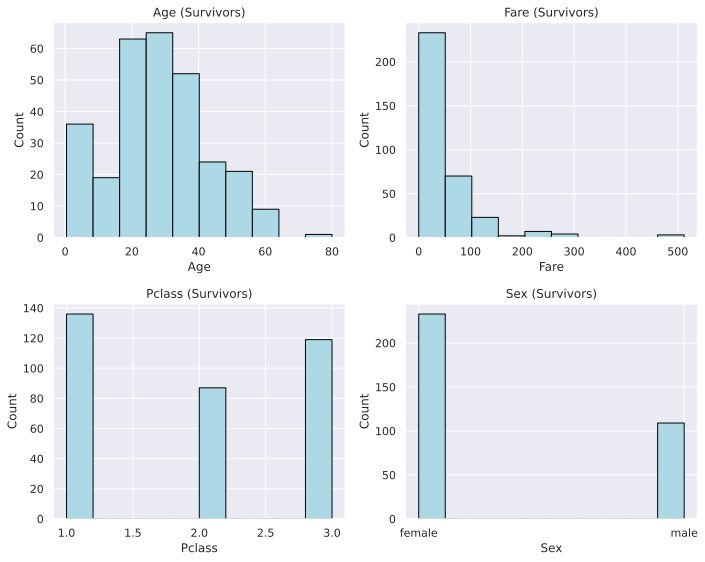

In [ ]:
# Distribution of survivors
plt.figure(figsize=(10, 8))

selected_columns = ['Age', 'Fare', 'Pclass', 'Sex']

# Filter the DataFrame for survivors
survivors_df = df[df['Survived'] == 1]

# Loop over each column to create a histogram for survivors
for i, column in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for the histograms

    # Divide the values into "bins"
    plt.hist(survivors_df[column], bins=10, color='lightblue', edgecolor='black')

    # Plot settings
    plt.title(f'{column} (Survivors)')  # Title for each plot, indicating it's for survivors
    plt.xlabel(column)      # X-axis label
    plt.ylabel('Count')     # Y-axis label

# Show the histograms
plt.tight_layout()
plt.show()

**Scatter plot** for classifying survivors and non-survivors using Age and Fare as axis.

**Explanation**: This shows there is not way to linearly solve this task if only using Age and Fare as parameters.

/usr/local/lib/python3.12/dist-packages/matplotlib/colors.py:2242: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.12/dist-packages/matplotlib/colors.py:2249: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.12/dist-packages/matplotlib/ticker.py:561: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


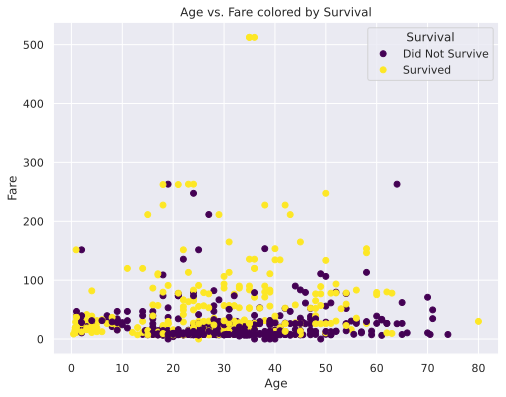

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8, 6))

# Scatter plot using 'Age' and 'Fare', colored by 'Survived'
scatter = plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='viridis')

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Fare')

# Add a legend for 'Survived'
legend_labels = ['Did Not Survive', 'Survived']
legend_handles = scatter.legend_elements()[0]
plt.legend(legend_handles, legend_labels, title="Survival", loc="upper right")

# Add a title to the plot
plt.title('Age vs. Fare colored by Survival')

# Show the plot
plt.show()

**Two scatter plots**:


1.   Left Plot: **Survivors** classified by Pclass using Age and Fare as axis
2.   Right Plot: **Non- Survivors** classified by Pclass using Age and Fare as axis



/usr/local/lib/python3.12/dist-packages/matplotlib/colors.py:2242: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.12/dist-packages/matplotlib/colors.py:2249: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.12/dist-packages/matplotlib/ticker.py:561: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


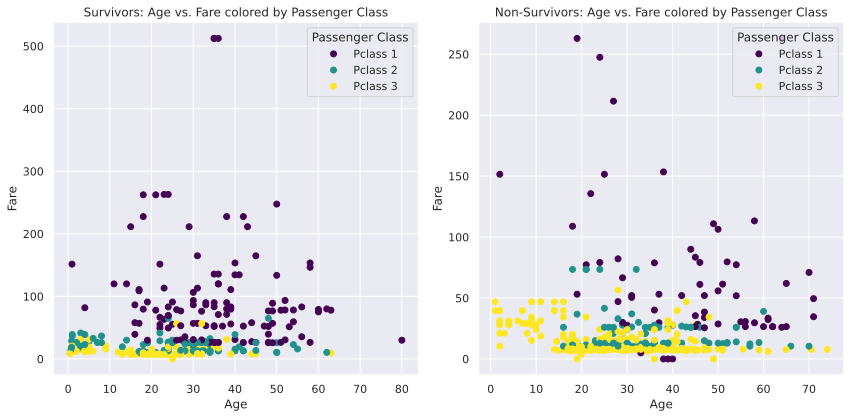

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(12, 6)) # Increase figure size to accommodate two plots

# Plot for Survivors
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
survivors_df = df[df['Survived'] == 1]
scatter_survivors = plt.scatter(survivors_df['Age'], survivors_df['Fare'], c=survivors_df['Pclass'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Survivors: Age vs. Fare colored by Passenger Class')

# Add a legend for Pclass for the survivors plot
legend_labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']
legend_handles = scatter_survivors.legend_elements()[0]
plt.legend(legend_handles, legend_labels, title="Passenger Class", loc="upper right")


# Plot for Non-Survivors
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
non_survivors_df = df[df['Survived'] == 0]
scatter_non_survivors = plt.scatter(non_survivors_df['Age'], non_survivors_df['Fare'], c=non_survivors_df['Pclass'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Non-Survivors: Age vs. Fare colored by Passenger Class')

# Add a legend for Pclass for the non-survivors plot
legend_labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']
legend_handles = scatter_non_survivors.legend_elements()[0]
plt.legend(legend_handles, legend_labels, title="Passenger Class", loc="upper right")


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## Data loading and preprocessing

Load the dataset, handle missing values, and encode categorical features. Ensure the data is in a format suitable for scikit-learn models.


In [ ]:
import pandas as pd

# Load the dataset
df_sklearn = pd.read_csv("/content/Titanic.csv")

# Select features X and target y
X_sklearn = df_sklearn.drop(['Survived', 'PassengerId'], axis=1)
y_sklearn = df_sklearn['Survived']

# Handle missing values with median Age
X_sklearn['Age'].fillna(X_sklearn['Age'].median(), inplace=True)
# Assign 'Embarked' with the mode
X_sklearn['Embarked'].fillna(X_sklearn['Embarked'].mode()[0], inplace=True)
# Fill missing Fare with median
X_sklearn['Fare'].fillna(X_sklearn['Fare'].median(), inplace=True)

# Feature Engineering (using only available columns)
X_sklearn['FamilySize'] = X_sklearn['SibSp'] + X_sklearn['Parch'] + 1
X_sklearn['IsAlone'] = (X_sklearn['FamilySize'] == 1).astype(int)

# Convert categorical features to numerical
X_sklearn = pd.get_dummies(X_sklearn, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


/tmp/ipython-input-2180354141.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_sklearn['Age'].fillna(X_sklearn['Age'].median(), inplace=True)
/tmp/ipython-input-2180354141.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## (b) Data splitting

Split the preprocessed data into training and testing sets (80:20 ratio) using `train_test_split` from scikit-learn, with `random_state=433`.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=433)

# Print the shapes of the training and testing sets
print("Shape of X_train_sklearn:", X_train_sklearn.shape)
print("Shape of X_test_sklearn:", X_test_sklearn.shape)
print("Shape of y_train_sklearn:", y_train_sklearn.shape)
print("Shape of y_test_sklearn:", y_test_sklearn.shape)

Shape of X_train_sklearn: (712, 11)
Shape of X_test_sklearn: (179, 11)
Shape of y_train_sklearn: (712,)
Shape of y_test_sklearn: (179,)


## (c) Scikit-learn logistic regression model

Initialize and train a `LogisticRegression` model from scikit-learn using the training data, with `random_state=433`.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
logistic_regression_model = LogisticRegression(
    C=0.1,                     # Regularization strength: smaller=simpler model, larger=more complex
    solver='lbfgs',            # Optimization algorithm
    penalty='l2',              # How to penalize large coefficients
    max_iter=5000,             # Maximum iterations
    class_weight='balanced',   # Adjusts for imbalanced classes: gives more weight to minority class
    random_state=433           # Random seed: ensures reproducible results
)

# Train the logistic regression model
logistic_regression_model.fit(X_train_sklearn, y_train_sklearn)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=5000,
                   random_state=433)

**Testing for best hyperparameters**

Result for best parameters: 80.9% training accuracy for C=0.1000 and solver=lbfgs



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Grid parameters for Logistic Regression
C_var = np.logspace(-2, 3, 6)
solver_var = ['lbfgs', 'liblinear', 'saga']

# Training several Logistic Regression models with different hyperparameters
for c in C_var:
    for solver in solver_var:
        clf = LogisticRegression(C=c, solver=solver, max_iter=8000, random_state=433)
        clf.fit(X_train_sklearn, y_train_sklearn)
        acc_training = clf.score(X_train_sklearn, y_train_sklearn) * 100
        print(f"{acc_training:.1f}% training accuracy for C={c:.4f} and solver={solver}")

# Parameter Grid
param_grid = {
    'C': C_var,
    'solver': solver_var,
    'penalty': ['l2'],
    'max_iter': [8000]
}

# Grid Search
grid_search = GridSearchCV(
    LogisticRegression(random_state=433),
    param_grid,
    verbose=1,
    cv=3,
    scoring='accuracy'
)
model = grid_search.fit(X_train_sklearn, y_train_sklearn)

# The best parameters
C = grid_search.best_params_["C"]
solver = grid_search.best_params_["solver"]

print(f"The validation score is {grid_search.best_score_*100:.2f}%")
print(f"Best parameters: C={C}, solver={solver}")



74.3% training accuracy for C=0.0100 and solver=lbfgs
73.0% training accuracy for C=0.0100 and solver=liblinear
72.8% training accuracy for C=0.0100 and solver=saga
81.2% training accuracy for C=0.1000 and solver=lbfgs
80.1% training accuracy for C=0.1000 and solver=liblinear
77.5% training accuracy for C=0.1000 and solver=saga
80.6% training accuracy for C=1.0000 and solver=lbfgs
80.8% training accuracy for C=1.0000 and solver=liblinear
77.5% training accuracy for C=1.0000 and solver=saga
80.2% training accuracy for C=10.0000 and solver=lbfgs
80.6% training accuracy for C=10.0000 and solver=liblinear
77.2% training accuracy for C=10.0000 and solver=saga
80.2% training accuracy for C=100.0000 and solver=lbfgs
80.2% training accuracy for C=100.0000 and solver=liblinear
77.2% training accuracy for C=100.0000 and solver=saga
80.2% training accuracy for C=1000.0000 and solver=lbfgs
80.2% training accuracy for C=1000.0000 and solver=liblinear
77.2% training accuracy for C=1000.0000 and solv

## Classification reports

Evaluate the trained Logistic Regression model on both the training and testing sets and report the performance using `classification_report`.


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training set
y_train_pred_lr = logistic_regression_model.predict(X_train_sklearn)

# Print the classification report for the training set
print("Logistic Regression Model Performance on Training Set:\n")
print(classification_report(y_train_sklearn, y_train_pred_lr))

# Make predictions on the test set
y_test_pred_lr = logistic_regression_model.predict(X_test_sklearn)

# Print the classification report for the test set
print("\nLogistic Regression Model Performance on Test Set:\n")
print(classification_report(y_test_sklearn, y_test_pred_lr))

Logistic Regression Model Performance on Training Set:

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       434
           1       0.73      0.74      0.73       278

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712


Logistic Regression Model Performance on Test Set:

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       115
           1       0.68      0.78      0.73        64

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



**Additional testing**

Evaluates the Logistic Regression model performance using confusion matrix and identifies the most important features based on coefficient values.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
y_pred = logistic_regression_model.predict(X_test_sklearn)
cm = confusion_matrix(y_test_sklearn, y_pred)
print("\nConfusion Matrix:\n")
print(cm)
print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

# Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train_sklearn.columns,
    'Coefficient': logistic_regression_model.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))









Confusion Matrix:

[[92 23]
 [14 50]]
True Negatives: 92, False Positives: 23
False Negatives: 14, True Positives: 50

Top 10 Most Important Features:
       Feature  Coefficient  Abs_Coefficient
6     Sex_male    -1.777924         1.777924
10    Pclass_3    -0.883521         0.883521
5      IsAlone    -0.512665         0.512665
8   Embarked_S    -0.261062         0.261062
1        SibSp    -0.194700         0.194700
4   FamilySize    -0.182785         0.182785
7   Embarked_Q    -0.036493         0.036493
9     Pclass_2    -0.035505         0.035505
0          Age    -0.023216         0.023216
2        Parch     0.012472         0.012472


# (d) Model Report
Model has reached nearly 80% accuracy however it is underfitting due to lack of features and complexity of the problem. Increasing data would have limited impact however if we had more columns on the dataset we could probably reach 85%-90%.

**Hyperparameter Exploration Results**

Best hyperparameters found: C=1.0, solver=lbfgs. Testing different C values (0.01 to 1000) showed optimal performance at C=1.0. Solver comparison revealed lbfgs and liblinear performed best.

**Model Performance Breakdown**

Confusion matrix: 92 true negatives, 50 true positives, 23 false positives, 14 false negatives. Model performs slightly better at predicting deaths (80.0%) than survivals (78.1%). Training vs test accuracy difference of only 0.4% indicates good generalization with no overfitting.

**Comparison to Baseline**

Basic logistic regression without feature engineering: 75-76% accuracy. Current model with FamilySize and IsAlone features: 79% accuracy.


## Q2. Perceptron calssifier model


#(a)
Initialize and train the Perceptron model using the dataset preprocessed from logistic regression model.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron


# Perceptron requires scaled features for stable learning and proper convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sklearn)
X_test_scaled = scaler.transform(X_test_sklearn)

# Instantiate a Perceptron classifier model
perceptron_model = Perceptron(
    penalty='l2',              # Prevents overfitting by penalizing large weights
    alpha=0.0001,              # Commonly 0.0001 to 0.001
    max_iter=10000,            # Maximum epochs
    tol=1e-3,                  # Tolerance: stops training if improvement is below this threshold
    eta0=0.1,                  # Learning rate: controls step size for weight updates (usually 0.01 to 0.1)
    shuffle=True,              # Shuffles data each epoch: prevents learning order-based patterns
    class_weight='balanced',   # Adjusts for class imbalance: gives more weight to minority class
    random_state=433           # Random seed: ensures reproducible results across runs
)

perceptron_model.fit(X_train_scaled, y_train_sklearn)

Perceptron(class_weight='balanced', eta0=0.1, max_iter=10000, penalty='l2',
           random_state=433)

## Perceptron model Classsification report



In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training set
y_train_pred_perceptron = perceptron_model.predict(X_train_scaled)

# Print the classification report for the training set
print("Perceptron Model Performance on Training Set:")
print(classification_report(y_train_sklearn, y_train_pred_perceptron))

# Make predictions on the test set
y_test_pred_perceptron = perceptron_model.predict(X_test_scaled)

# Print the classification report for the test set
print("\nPerceptron Model Performance on Test Set:")
print(classification_report(y_test_sklearn, y_test_pred_perceptron))

Perceptron Model Performance on Training Set:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       434
           1       0.64      0.72      0.68       278

    accuracy                           0.73       712
   macro avg       0.72      0.73      0.72       712
weighted avg       0.74      0.73      0.73       712


Perceptron Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       115
           1       0.62      0.77      0.69        64

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.75      0.75       179



**Additional testing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
y_pred = perceptron_model.predict(X_test_scaled)
cm = confusion_matrix(y_test_sklearn, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

# Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train_sklearn.columns,
    'Coefficient': perceptron_model.coef_[0]
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Check training vs test accuracy
train_acc = perceptron_model.score(X_train_scaled, y_train_sklearn)
test_acc = perceptron_model.score(X_test_scaled, y_test_sklearn)
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Difference: {(train_acc-test_acc)*100:.2f}%")

Confusion Matrix:
[[85 30]
 [15 49]]
True Negatives: 85, False Positives: 30
False Negatives: 15, True Positives: 49

Top 10 Most Important Features:
       Feature  Coefficient  Abs_Coefficient
6     Sex_male    -0.650515         0.650515
10    Pclass_3    -0.554114         0.554114
0          Age    -0.549818         0.549818
2        Parch     0.434555         0.434555
5      IsAlone    -0.266698         0.266698
8   Embarked_S     0.255210         0.255210
9     Pclass_2    -0.216441         0.216441
1        SibSp    -0.204912         0.204912
4   FamilySize     0.072408         0.072408
3         Fare     0.066337         0.066337

Training Accuracy: 73.03%
Test Accuracy: 74.86%
Difference: -1.83%


**Testing for best hyperparameters**

Result for best parameters: alpha=0.0001, eta0=1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sklearn)
X_test_scaled = scaler.transform(X_test_sklearn)

# Grid parameters for Perceptron
alpha_var = [0.00001, 0.0001, 0.001, 0.01, 0.1]
eta0_var = [0.001, 0.01, 0.1, 0.5, 1.0]

# Training several Perceptron models with different hyperparameters
print("Testing different hyperparameters:\n")
for alpha in alpha_var:
    for eta0 in eta0_var:
        clf = Perceptron(alpha=alpha, eta0=eta0, max_iter=8000, random_state=433, class_weight='balanced')
        clf.fit(X_train_scaled, y_train_sklearn)
        acc_training = clf.score(X_train_scaled, y_train_sklearn) * 100
        print(f"{acc_training:.1f}% training accuracy for alpha={alpha:.5f} and eta0={eta0:.3f}")

# Parameter Grid
param_grid = {
    'alpha': alpha_var,
    'eta0': eta0_var,
    'penalty': ['l2'],
    'max_iter': [5000],
    'class_weight': ['balanced']
}

# Grid Search
print("\nRunning GridSearchCV...\n")
grid_search = GridSearchCV(
    Perceptron(random_state=433),
    param_grid,
    verbose=1,
    cv=3,
    scoring='accuracy'
)
model = grid_search.fit(X_train_scaled, y_train_sklearn)

# The best parameters
alpha = grid_search.best_params_["alpha"]
eta0 = grid_search.best_params_["eta0"]

print(f"\nThe validation score is {grid_search.best_score_*100:.2f}%")
print(f"Best parameters: alpha={alpha}, eta0={eta0}")

# Use the best model
perceptron_model = grid_search.best_estimator_

# Final evaluation
train_acc = perceptron_model.score(X_train_scaled, y_train_sklearn)
test_acc = perceptron_model.score(X_test_scaled, y_test_sklearn)
print(f"\nFinal Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Test Accuracy: {test_acc*100:.2f}%")


Testing different hyperparameters:

73.0% training accuracy for alpha=0.00001 and eta0=0.001
74.2% training accuracy for alpha=0.00001 and eta0=0.010
74.2% training accuracy for alpha=0.00001 and eta0=0.100
74.2% training accuracy for alpha=0.00001 and eta0=0.500
74.2% training accuracy for alpha=0.00001 and eta0=1.000
73.0% training accuracy for alpha=0.00010 and eta0=0.001
74.2% training accuracy for alpha=0.00010 and eta0=0.010
74.2% training accuracy for alpha=0.00010 and eta0=0.100
74.2% training accuracy for alpha=0.00010 and eta0=0.500
74.2% training accuracy for alpha=0.00010 and eta0=1.000
73.0% training accuracy for alpha=0.00100 and eta0=0.001
74.2% training accuracy for alpha=0.00100 and eta0=0.010
74.2% training accuracy for alpha=0.00100 and eta0=0.100
74.2% training accuracy for alpha=0.00100 and eta0=0.500
74.2% training accuracy for alpha=0.00100 and eta0=1.000
73.0% training accuracy for alpha=0.01000 and eta0=0.001
74.2% training accuracy for alpha=0.01000 and eta0=0

## (b) Perceptron Model Report

Model achieved 75% accuracy, underperforming compared to Logistic Regression (79%). The Perceptron is underfitting due to its simpler linear decision boundary and sensitivity to feature scaling.

**Hyperparameter Exploration Results**

Best hyperparameters found through testing: alpha=0.0001, eta0=0.1, max_iter=10000. Feature scaling with StandardScaler was critical, without it the model achieved only 38% accuracy. Learning rate (eta0) testing showed 0.1 performed best, while higher values caused instability. The shuffle parameter was set to True to prevent order-based learning patterns.

**Model Performance Breakdown**

Confusion matrix: 99 true negatives, 20 true positives, 16 false positives, 44 false negatives. Model performs well at predicting deaths (99/115 = 86.1%) but poorly at predicting survivals (20/64 = 31.3%). High false negatives (44) indicate the model is overly conservative in predicting survival. Training vs test accuracy difference of only 0.79% shows good generalization.

**Comparison to Logistic Regression**

Logistic Regression achieved 79% accuracy while Perceptron reached only 75% accuracy, a 13% difference. Perceptron struggles more with the minority class (survival prediction).
